In [ ]:
""" @author: Matthew Mills
    @date: 02/25/2020"""

#https://keras.io/initializers/

In [1]:
import cv2
import glob
import numpy as np

from keras.layers import concatenate
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose
from keras.engine.input_layer import Input
import keras
import time

from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def keras_custom_loss_function(y_actual, y_predicted):
    custom_loss_value = keras.losses.mean_squared_error(y_actual, y_predicted) / (128 * 128)
    return custom_loss_value

In [7]:
def make_image_set(path):
    
    data = []
    files = glob.glob(path)
    
    for myFile in files:
        #print(myFile)
        image = cv2.imread(myFile)#.astype('float32')
        plt.figure()
        plt.imshow(image)
        image = cv2.resize(image, (128,128))
        #print(image)

        data.append(image[:,:,0])
        
    np_data = np.array(data)
    
    return np_data

In [4]:
def build_model(input_layer, start_neurons):
    
    #print(input_layer.shape)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(input_layer)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)
    


    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.5)(pool2)



    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.5)(pool3)



    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.5)(pool4)


    # Middle

    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(pool4)
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(convm)

    

    deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same", kernel_initializer = 'he_normal')(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(uconv4)



    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same", kernel_initializer = 'he_normal')(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(uconv3)


    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same", kernel_initializer = 'he_normal')(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same", kernel_initializer = 'he_normal')(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same", kernel_initializer = 'he_normal')(uconv1)

    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid", kernel_initializer = 'he_normal')(uconv1)


    return output_layer

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


'x_test = make_image_set(x_test_path)\ny_train = make_image_set(y_train_path)\ny_test = make_image_set(y_test_path)\n\nx_train = np.reshape(x_train, (28,128,128,1))\nx_test = np.reshape(x_test, (12,128,128,1))\n\ny_train = np.reshape(x_train, (28,128,128,1))\ny_test = np.reshape(x_test, (12,128,128,1))\n\ndatagen = ImageDataGenerator(\n    featurewise_center=True,\n    featurewise_std_normalization=True,\n    rotation_range=20,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    horizontal_flip=True,\n    vertical_flip=True,\n    fill_mode="wrap",\n    rescale=4)\n\nimageGen = datagen.flow(x_train, y_train, batch_size=8, shuffle=True)\n#\ndatagen.fit(x_train)'

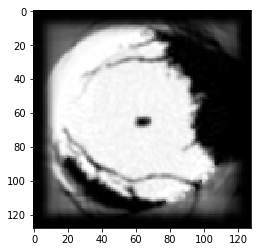

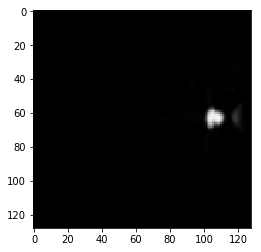

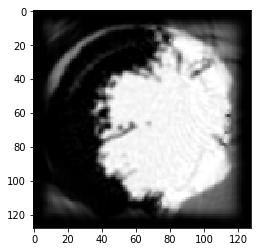

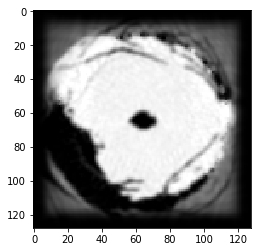

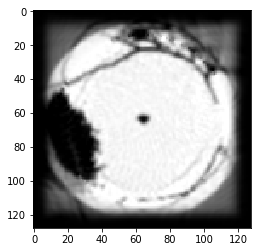

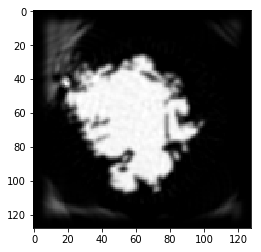

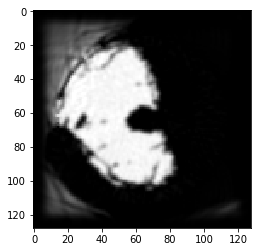

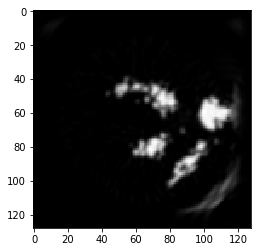

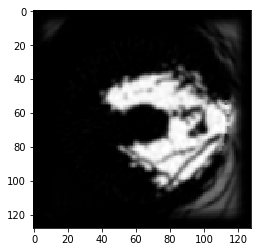

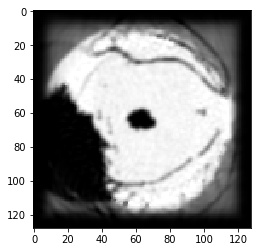

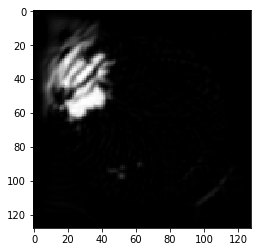

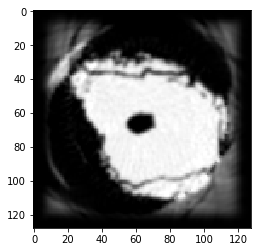

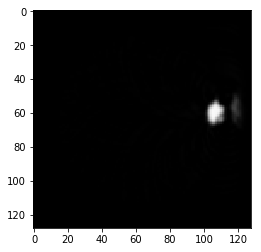

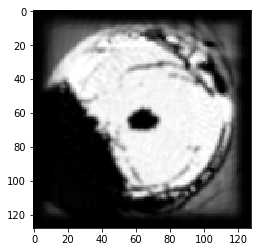

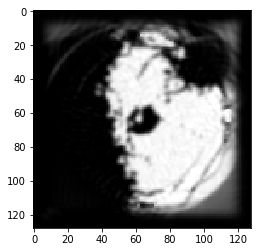

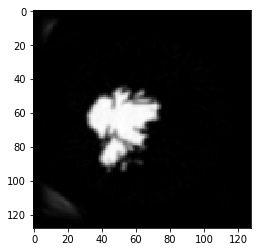

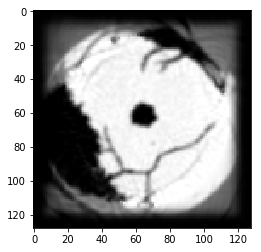

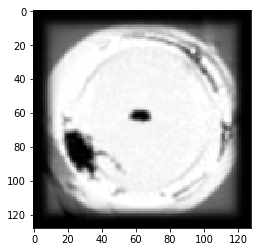

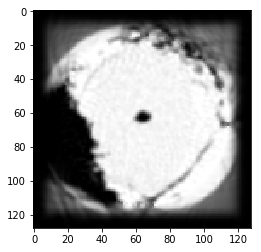

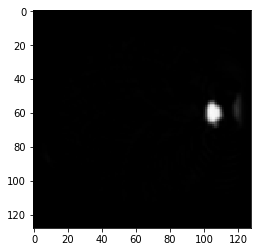

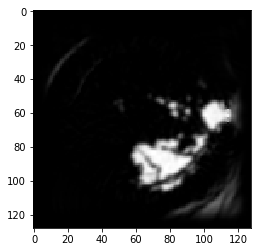

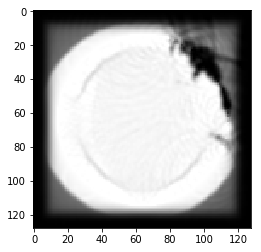

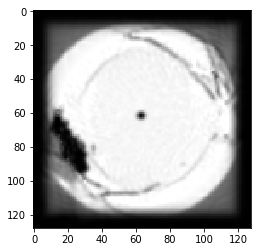

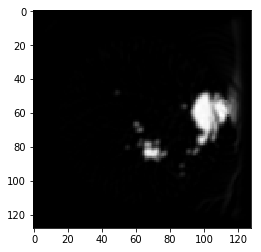

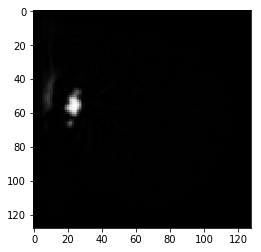

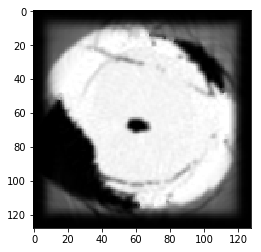

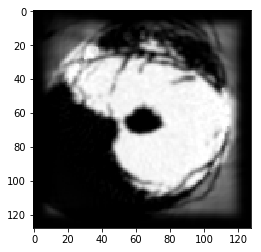

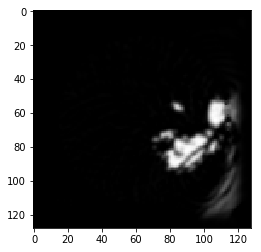

In [8]:
input_layer = Input(shape=(128, 128, 1))
output_layer = build_model(input_layer, 16)


x_train_path = r"C:/Users/Matthew/Documents/Life/Employment/Jobs/UI_Research/Math/YNET_files/training/images/time_reversal_data/*.PNG"
x_test_path = r"C:/Users/Matthew/Documents/Life/Employment/Jobs/UI_Research/Math/YNET_files/test/images/time_reversal_data/*.PNG"
y_train_path = r"C:/Users/Matthew/Documents/Life/Employment/Jobs/UI_Research/Math/YNET_files/training/images/*.TIF"
y_test_path = r"C:/Users/Matthew/Documents/Life/Employment/Jobs/UI_Research/Math/YNET_files/test/images/*.TIF"

x_train = make_image_set(x_train_path)
x_test = make_image_set(x_test_path)
y_train = make_image_set(y_train_path)
y_test = make_image_set(y_test_path)

x_train = np.reshape(x_train, (28,128,128,1))
x_test = np.reshape(x_test, (12,128,128,1))

y_train = np.reshape(x_train, (28,128,128,1))
y_test = np.reshape(x_test, (12,128,128,1))

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="wrap",
    rescale=4)

imageGen = datagen.flow(x_train, y_train, batch_size=8, shuffle=True)
#
datagen.fit(x_train)



In [15]:
model = keras.Model(input_layer, output_layer)

#optimizer=keras.optimizers.Adadelta(lr=1000.0, rho=0.95)
#sgd = keras.optimizers.SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True)
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
#print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

model.compile(loss=keras_custom_loss_function,
          optimizer=sgd,
          metrics=['accuracy'])

model.summary()

history = model.fit_generator(imageGen, steps_per_epoch=len(x_train), epochs=20, validation_data=(x_test, y_test)) 


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 128, 128, 16) 160         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 128, 128, 16) 2320        conv2d_39[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 64, 64, 16)   0           conv2d_40[0][0]                  
__________________________________________________________________________________________________
dropout_17

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


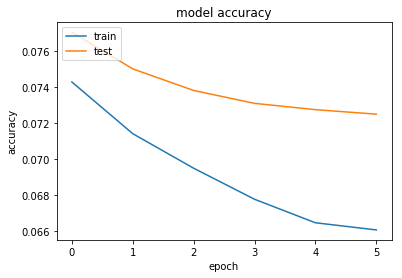

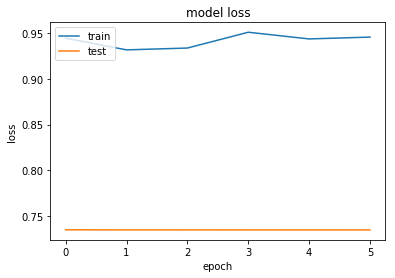

Test loss: 0.7346108555793762
Test accuracy: 0.0723978653550148


In [13]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#model.fit(x_train, y_train, batch_size=20, epochs=12, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])